In [67]:
import os
import sys
sys.path.append(os.path.abspath('..')) # add parent path to working directory

In [68]:
from importlib import reload # Reload models so that changes in the scripts are loaded
from scripts import data_load_clean_transform, change_point_analysis
reload(data_load_clean_transform)
reload(change_point_analysis)

<module 'scripts.change_point_analysis' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-10\\scripts\\change_point_analysis.py'>

In [69]:
from scripts.data_load_clean_transform import DataLoader, DataCleaner  # import data loader and data clearner classes
from scripts.change_point_analysis import SalesChangePointAnalysis

In [70]:
#Load CSV File
file_path = '../week 10 data/Data/BrentOilPrices.csv'
load_data = DataLoader(file_path)
data = load_data.load_csv()

2025-02-20 13:53:06,864 - INFO - Data successfully loaded from ../week 10 data/Data/BrentOilPrices.csv
2025-02-20 13:53:06,874 - INFO - DataFrame Shape: (9011, 2)


In [71]:
# see information about loaded data
cleaner = DataCleaner(data)
cleaner.check_missing_values()

2025-02-20 13:53:09,175 - INFO - Checking for missing values in the DataFrame.
2025-02-20 13:53:09,180 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,Date,0,0.0,object
1,Price,0,0.0,float64


In [72]:
cleaner.transform_datetime('Date')

2025-02-20 13:53:12,192 - INFO - Transforming datetime column 'Date' without timezone conversion.


c:\ML and DS Files\Kifiya AI\Kaim-week-10\scripts\data_load_clean_transform.py:100: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column] = pd.to_datetime(self.df[column])


2025-02-20 13:53:13,551 - INFO - Datetime transformation for column 'Date' completed.


In [73]:
cleaner.check_missing_values()

2025-02-20 13:53:15,142 - INFO - Checking for missing values in the DataFrame.
2025-02-20 13:53:15,146 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,Date,0,0.0,datetime64[ns]
1,Price,0,0.0,float64


In [74]:
# Initialize Analysis Class
analysis = SalesChangePointAnalysis(data)

2025-02-20 13:53:24,623 - INFO - Data initialized, sorted, and Date set as index.


In [75]:
# Get Summary
summary = analysis.data_summary()
print(summary)

2025-02-20 13:53:32,193 - INFO - Generating data summary.
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


In [76]:
# Check Stationarity
is_stationary = analysis.check_stationarity()
print("Is Data Stationary?", is_stationary)

2025-02-20 13:53:36,234 - INFO - ADF Statistic: -1.9938560113924677, p-value: 0.28927350489340287
Is Data Stationary? False


#### We may need to differentiate the data before applying ARIMA, as ARIMA models assume stationarity.

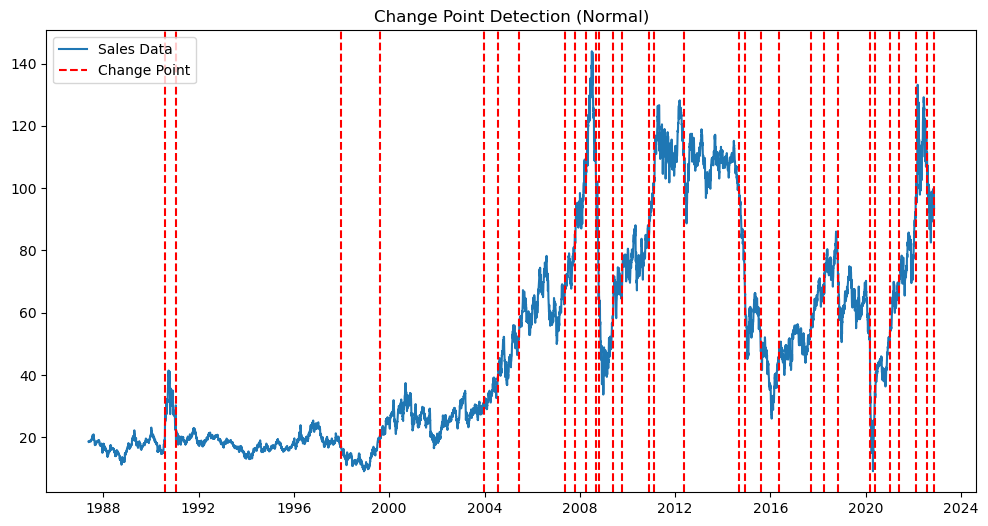

2025-02-20 20:00:23,835 - INFO - Detected change points: [820, 935, 2695, 3100, 4220, 4370, 4600, 5090, 5200, 5315, 5415, 5445, 5595, 5695, 5980, 6035, 6340, 6925, 6985, 7155, 7350, 7700, 7840, 7990, 8330, 8380, 8540, 8640, 8815, 8940, 9011]
Change Points (Normal): [820, 935, 2695, 3100, 4220, 4370, 4600, 5090, 5200, 5315, 5415, 5445, 5595, 5695, 5980, 6035, 6340, 6925, 6985, 7155, 7350, 7700, 7840, 7990, 8330, 8380, 8540, 8640, 8815, 8940, 9011]


In [89]:
# Normal Change Point Detection
change_points = analysis.detect_change_points()
print("Change Points (Normal):", change_points)

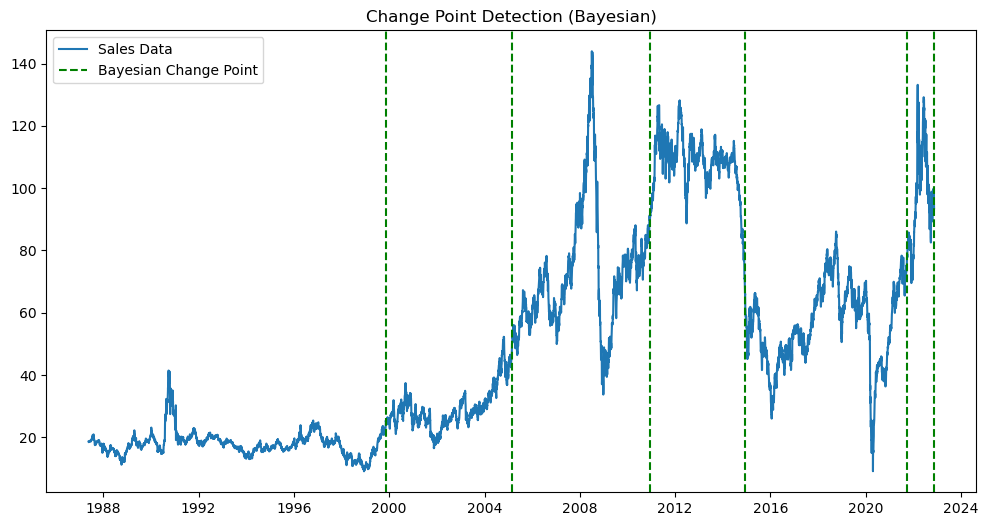

2025-02-20 13:55:51,048 - INFO - Bayesian detected change points: [3165, 4520, 5990, 6985, 8720, 9011]
Change Points (Bayesian): [3165, 4520, 5990, 6985, 8720, 9011]


In [79]:
# Bayesian Change Point Detection
bayesian_change_points = analysis.detect_change_points_bayesian()
print("Change Points (Bayesian):", bayesian_change_points)

In [ ]:
arima_summary = analysis.fit_arima(order=(2,1,2))  # Adjust order as needed
print(arima_summary)

2025-02-20 16:17:46,875 - INFO - Fitting ARIMA model with order (2, 1, 2).


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

2025-02-20 16:17:54,116 - INFO - ARIMA model fitted successfully.
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14532.914
Date:                Thu, 20 Feb 2025   AIC                          29075.828
Time:                        16:17:54   BIC                          29111.358
Sample:                             0   HQIC                         29087.917
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0718      0.019     -3.764      0.000      -0.109      -0.034
ar.L2         -0.9087      0.019    -48.400      0.000      -0.94

In [85]:
arima_forecast = analysis.forecast_arima(steps=30)
print(arima_forecast)


2025-02-20 16:18:18,153 - INFO - Forecasting next 30 days using ARIMA.
9011    93.401520
9012    93.623227
9013    93.778578
9014    93.565961
9015    93.440062
9016    93.642303
9017    93.742185
9018    93.551240
9019    93.474189
9020    93.653230
9021    93.710391
9022    93.543594
9023    93.503629
9024    93.658064
9025    93.683291
9026    93.541147
9027    93.528429
9028    93.658507
9029    93.660724
9030    93.542365
9031    93.548849
9032    93.655935
9033    93.642354
9034    93.546021
9035    93.565279
9036    93.651432
9037    93.627747
9038    93.551162
9039    93.578183
9040    93.645835
Name: predicted_mean, dtype: float64


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [86]:
arima_forecast = analysis.forecast_arima(steps=30)
print(arima_forecast)


2025-02-20 16:18:33,677 - INFO - Forecasting next 30 days using ARIMA.
9011    93.401520
9012    93.623227
9013    93.778578
9014    93.565961
9015    93.440062
9016    93.642303
9017    93.742185
9018    93.551240
9019    93.474189
9020    93.653230
9021    93.710391
9022    93.543594
9023    93.503629
9024    93.658064
9025    93.683291
9026    93.541147
9027    93.528429
9028    93.658507
9029    93.660724
9030    93.542365
9031    93.548849
9032    93.655935
9033    93.642354
9034    93.546021
9035    93.565279
9036    93.651432
9037    93.627747
9038    93.551162
9039    93.578183
9040    93.645835
Name: predicted_mean, dtype: float64


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [87]:
garch_summary = analysis.fit_garch(p=1, q=1)
print(garch_summary)


2025-02-20 16:18:54,539 - INFO - Fitting GARCH model with (p=1, q=1).
2025-02-20 16:18:54,834 - INFO - GARCH model fitted successfully.
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -35210.2
Distribution:                  Normal   AIC:                           70428.5
Method:            Maximum Likelihood   BIC:                           70456.9
                                        No. Observations:                 9011
Date:                Thu, Feb 20 2025   Df Residuals:                     9010
Time:                        16:18:54   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-------

In [88]:
garch_forecast = analysis.forecast_garch(steps=30)
print(garch_forecast)


2025-02-20 16:19:13,713 - INFO - Forecasting volatility for next 30 days using GARCH.
h.01    5680.770918
h.02    5680.846504
h.03    5680.922091
h.04    5680.997677
h.05    5681.073263
h.06    5681.148849
h.07    5681.224435
h.08    5681.300022
h.09    5681.375608
h.10    5681.451194
h.11    5681.526780
h.12    5681.602367
h.13    5681.677953
h.14    5681.753539
h.15    5681.829125
h.16    5681.904711
h.17    5681.980298
h.18    5682.055884
h.19    5682.131470
h.20    5682.207056
h.21    5682.282642
h.22    5682.358229
h.23    5682.433815
h.24    5682.509401
h.25    5682.584987
h.26    5682.660573
h.27    5682.736160
h.28    5682.811746
h.29    5682.887332
h.30    5682.962918
Name: 2022-11-14 00:00:00, dtype: float64
